## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [2]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv", sep=",")

In [4]:
data.head(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,>= 7 yrs,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [5]:
data.tail(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,>= 7 yrs,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,< 1 yr,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,>= 7 yrs,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,< 1 yr,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,>= 7 yrs,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [6]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

У нас в таблице тысяча строк, у каждого столбца тысяча ненулевых значений. Значит, пропусков нет.

### Разделение на признаки

**Количественный признак** --- отражает размеры.

**Бинарный** --- да/нет.

**Порядковый** --- имеет несколько ранжированных вариантов.

**Категориальные** --- несравнимые.

In [8]:
data.columns # чтобы ничего не забыть

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [9]:
quantitative = ['duration', 'amount', 'age'] # количественные
 
binar = ['people_liable', 'telephone', 'foreign_worker', 'credit_risk'] # бинарные
 
ordable = ['status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits'] # порядковые
 
categorial = ['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 
              'other_installment_plans', 'housing', 'job'] # категориальные

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [ ]:
data.groupby(["purpose"])["amount"].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [12]:
data_help = data[data.age < 30]
data_help_rent = data_help[data_help.housing == 'rent']
print(data_help_rent.shape[0]/data_help.shape[0] * 100)

66.66666666666666


In [13]:
data_help = data[data.age > 40]
data_help_rent = data_help[data_help.housing == 'rent']
print(data_help_rent.shape[0]/data_help.shape[0] * 100)

68.01470588235294


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [15]:
data["foreign_worker"].value_counts() # проверяю, что ответы только yes/no

no     963
yes     37
Name: foreign_worker, dtype: int64

In [16]:
data[data.foreign_worker == 'yes'].number_credits.value_counts() # смотрю, что тут

1      25
2-3    11
4-5     1
Name: number_credits, dtype: int64

Значит, у одного.

### Задание 6 (1 балл)

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

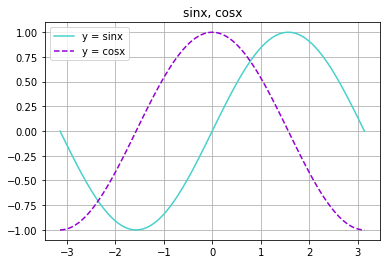

In [18]:
x = np.linspace(-np.pi, np.pi, 100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.title("sinx, cosx") # перед заданиями написано подписывать графики...
plt.grid()
plt.plot(x, y1, label='y = sinx', color='mediumturquoise')
plt.plot(x, y2, label='y = cosx', linestyle = '--', color='darkviolet')
plt.legend()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

<BarContainer object of 4 artists>

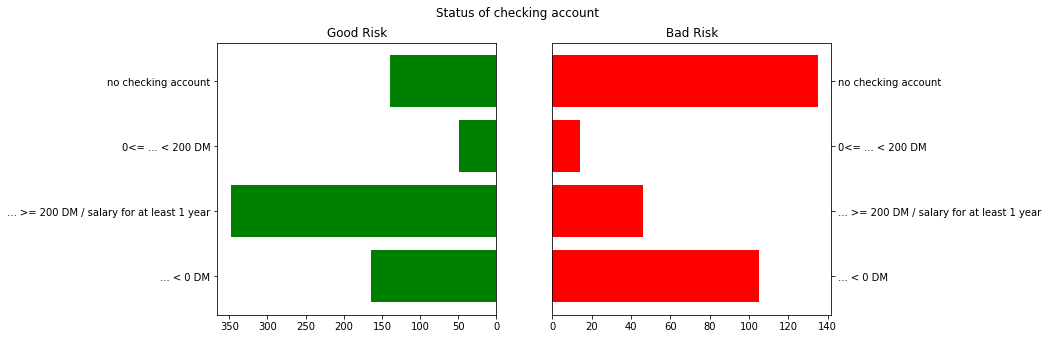

In [19]:
fig = plt.figure(figsize=(17, 5))
fig.suptitle('Status of checking account', x=0.37)
 
ax = fig.add_subplot(131)
plt.gca().invert_xaxis()
number_good = data[data.credit_risk == 'good']["status"].value_counts().sort_index()
statuses_good = number_good.index.tolist()
numbers_good = number_good.tolist()
plt.title('Good Risk')
plt.barh(statuses_good, numbers_good, color='green')
 
ax = fig.add_subplot(132)
plt.gca().yaxis.tick_right()
number_bad = data[data.credit_risk == 'bad']["status"].value_counts().sort_index()
statuses_bad = number_bad.index.tolist()
numbers_bad = number_bad.tolist()
plt.title('Bad Risk')
plt.barh(statuses_bad, numbers_bad, color='red')

### Задание 8  (0.5 балла)

In [20]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

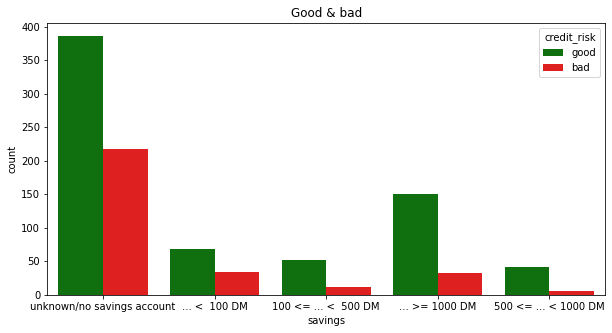

In [21]:
fig = plt.figure(figsize=(10, 5)) # чтобы внизу все не накрыло друг друга ужасно...
sns.countplot(x='savings', hue='credit_risk', data=data, palette=['g', 'r'])
plt.title('Good & bad') # подписываю график, как перед заданиями сказано...
plt.show()

In [22]:
data[data.credit_risk == 'good']["savings"].value_counts() # проверочка, что все так

unknown/no savings account    386
... >= 1000 DM                151
... <  100 DM                  69
100 <= ... <  500 DM           52
500 <= ... < 1000 DM           42
Name: savings, dtype: int64

Мне больше нравится этот способ, но только countplot было нелегко нагуглить, если не знать, чего искать, а на семинаре не рассказали!!!

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

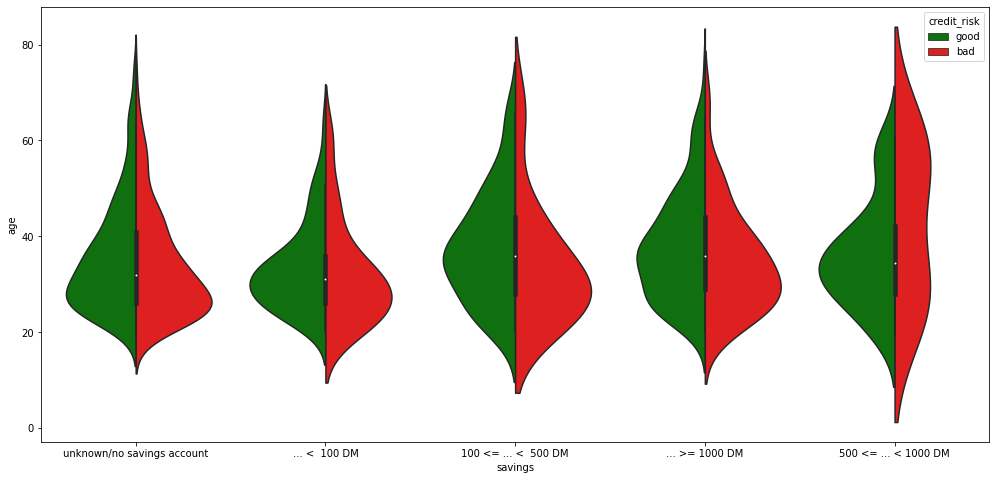

In [23]:
fig = plt.figure(figsize=(17, 8))
ax = sns.violinplot(x='savings', y='age', hue='credit_risk', data=data, palette=['g', 'r'], split=True)

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


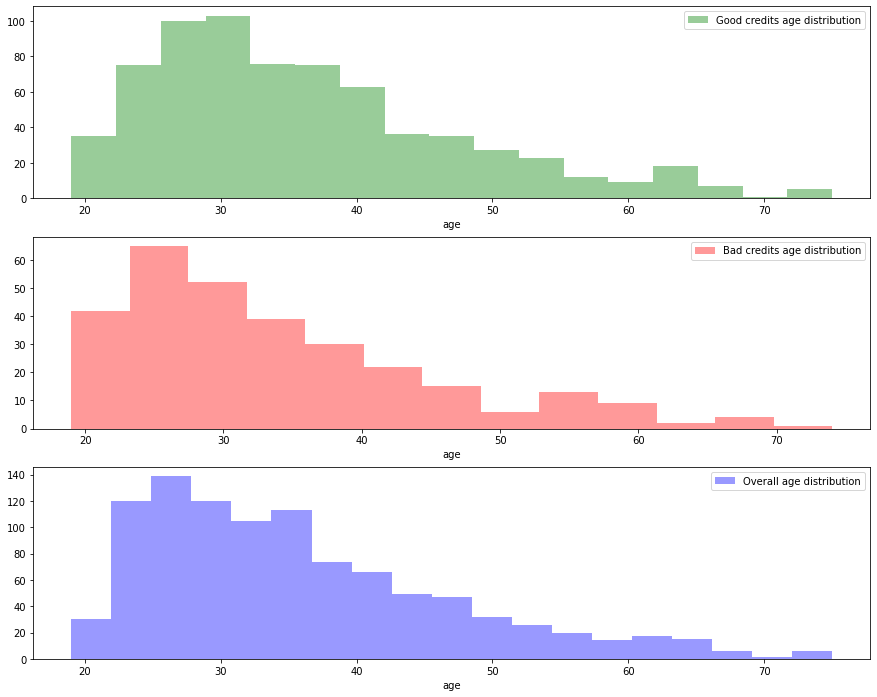

In [24]:
fig = plt.figure(figsize=(15, 12))
 
ax1 = fig.add_subplot(311)
hist1 = sns.distplot(data[data.credit_risk == 'good']["age"], kde=False, color='green')
plt.legend(('Good credits age distribution', ''))
 
ax2 = fig.add_subplot(312)
hist2 = sns.distplot(data[data.credit_risk == 'bad']["age"], kde=False, color='red')
plt.legend(('Bad credits age distribution', ''))
 
ax3 = fig.add_subplot(313)
hist3 = sns.distplot(data["age"], kde=False, color='blue')
plt.legend(('Overall age distribution', ''))

Если нужно пустое место сверху, как в оригинальной картинке гистограммы, то можно написать plt.ylim(*нужный разброс*)

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

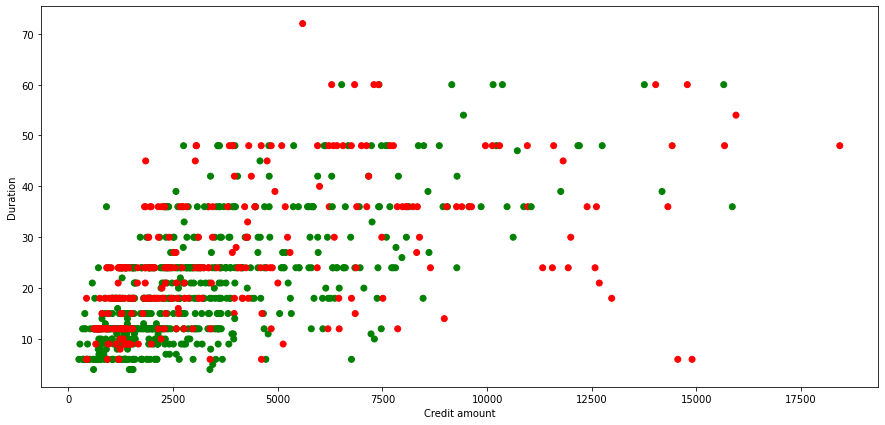

In [25]:
fig = plt.figure(figsize=(15, 7))
plt.xlabel('Credit amount')
plt.ylabel('Duration')
 
credit_risk_column = data["credit_risk"].tolist()
colors = ['g' if credit_risk_column[i] == 'good' else 'r' for i in range(1000)]
 
plt.scatter(data["amount"], data["duration"], color=colors)

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

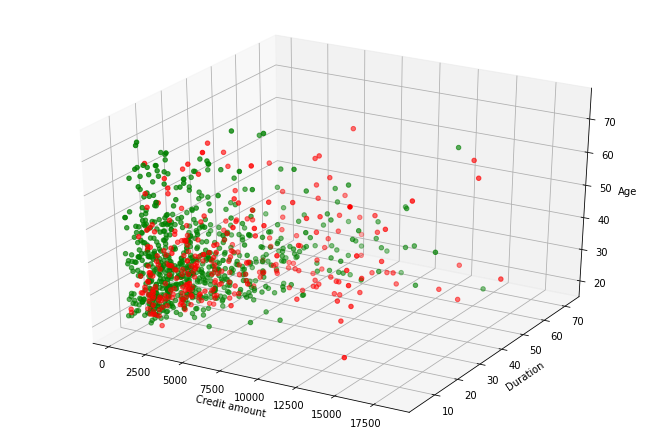

In [26]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9, 6))
ax = Axes3D(fig)
 
credit_risk_column = data["credit_risk"].tolist()
colors = ['g' if credit_risk_column[i] == 'good' else 'r' for i in range(1000)]
 
x = data["amount"]
y = data["duration"]
z = data["age"]
 
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
 
ax.scatter(x, y, z, color=colors)

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

Во втором задании мы уже выделили порядковые и бинарные признаки. Сейчас мы просто заменим все их значения на числа, а потом удалим категориальные признаки.

In [27]:
binar

['people_liable', 'telephone', 'foreign_worker', 'credit_risk']

In [28]:
# сейчас буду смотреть, какие тут значения есть
print(data['people_liable'].value_counts(),
data['telephone'].value_counts(),
data['foreign_worker'].value_counts(),
data['credit_risk'].value_counts(), sep='\n')

0 to 2       845
3 or more    155
Name: people_liable, dtype: int64
no                           596
yes (under customer name)    404
Name: telephone, dtype: int64
no     963
yes     37
Name: foreign_worker, dtype: int64
good    700
bad     300
Name: credit_risk, dtype: int64


In [29]:
data['people_liable'] = data['people_liable'].apply(lambda x: 0 if x == '0 to 2' else 1)
data['telephone'] = data['telephone'].apply(lambda x: 0 if x == 'no' else 1)
data['foreign_worker'] = data['foreign_worker'].apply(lambda x: 0 if x == 'no' else 1)
data['credit_risk'] = data['credit_risk'].apply(lambda x: 0 if x == 'good' else 1)
 
# кажется, было неоптимально и с replace лучше, но хорошие решения приходят только после плохих...

In [ ]:
ordable

['status',
 'savings',
 'employment_duration',
 'installment_rate',
 'present_residence',
 'number_credits']

In [30]:
print(data['status'].value_counts(),
data['savings'].value_counts(),
data['employment_duration'].value_counts(),
data['installment_rate'].value_counts(),
data['present_residence'].value_counts(),
data['number_credits'].value_counts(), sep='\n')

... >= 200 DM / salary for at least 1 year    394
no checking account                           274
... < 0 DM                                    269
0<= ... < 200 DM                               63
Name: status, dtype: int64
unknown/no savings account    603
... >= 1000 DM                183
... <  100 DM                 103
100 <= ... <  500 DM           63
500 <= ... < 1000 DM           48
Name: savings, dtype: int64
1 <= ... < 4 yrs    339
>= 7 yrs            253
4 <= ... < 7 yrs    174
< 1 yr              172
unemployed           62
Name: employment_duration, dtype: int64
< 20              476
25 <= ... < 35    231
20 <= ... < 25    157
>= 35             136
Name: installment_rate, dtype: int64
>= 7 yrs            413
1 <= ... < 4 yrs    308
4 <= ... < 7 yrs    149
< 1 yr              130
Name: present_residence, dtype: int64
1       633
2-3     333
4-5      28
>= 6      6
Name: number_credits, dtype: int64


In [31]:
data['status'] = data['status'].replace(['no checking account', '... < 0 DM', '0<= ... < 200 DM', '... >= 200 DM / salary for at least 1 year'], [0, 1, 2, 3])
data['savings'] = data['savings'].replace(['unknown/no savings account', '... <  100 DM', '100 <= ... <  500 DM', '500 <= ... < 1000 DM', '... >= 1000 DM'], [0, 1, 2, 3, 4])
data['employment_duration'] = data['employment_duration'].replace(['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'], [0, 1, 2, 3, 4])
data['installment_rate'] = data['installment_rate'].replace(['< 20', '20 <= ... < 25', '25 <= ... < 35', '>= 35'], [0, 1, 2, 3])
data['present_residence'] = data['present_residence'].replace(['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'], [0, 1, 2, 3])
data['number_credits'] = data['number_credits'].replace(['1', '2-3', '4-5', '>= 6'], [0, 1, 2, 3])

Теперь кикнем категориальные. Мы их тоже уже выделяли.

In [33]:
data = data.drop(columns=categorial)

In [34]:
data.info() # проверим, что все заменилось

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   status               1000 non-null   int64
 1   duration             1000 non-null   int64
 2   amount               1000 non-null   int64
 3   savings              1000 non-null   int64
 4   employment_duration  1000 non-null   int64
 5   installment_rate     1000 non-null   int64
 6   present_residence    1000 non-null   int64
 7   age                  1000 non-null   int64
 8   number_credits       1000 non-null   int64
 9   people_liable        1000 non-null   int64
 10  telephone            1000 non-null   int64
 11  foreign_worker       1000 non-null   int64
 12  credit_risk          1000 non-null   int64
dtypes: int64(13)
memory usage: 101.7 KB


Заменилось-удалилось -- остались только числа.

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

Постараюсь использовать каждое задание.

7. Люди с высоким текущим счетом выплачивают гораздо лучше. Те, кто не проверяют, примерно одинаково выплачивают. Те, у кого нет денег, скорее выплачивают, чем нет. Те, у кого немного денег, выплачитывают, но хуже тех, у кого денег побольше.

8. Количество хороших случаев для < 100, < 500, < 1000, уменьшается. Те, кто не проверяет или у кого > 1000, скорее выплачивают.

9. Все очень сложно. Это слишком сложный анализ для примитивной программы, которую я хочу написать. 

10. 30-40 лет явно хорошо выплачивают.

11. Размер кредита меньше 5т => не ахти платят.

12. Размер кредита растет => хуже платят.

Если кратко, то пока я пробую примитивно, а не тяжело анализируя (у меня лапки),

Если сумма кредита растет, то риск повышается. Если статус (по нашему порядку) растет, то риск понижается. Если возраст 30-40, то риск понижается. (удалось уточнить только про них)... Если размер кредита < 5т, то риск повышается. В остальном если размер кредита повышается, то риск понижается. Осталось подобрать эти коэффициенты. 

Это очень сложно, попробую проще. Учту размер кредита и текущий счет. Отнормирую их, чтобы они стали в пределах от нуля до единицы. Т.к. при увеличении кредита скорее меньше платят, это значение умножу на -1. Т.к. при увеличении текущего счета скорее больше, это умножу на 1. Потом сложу и получу число. Чем больше получился ответ, тем меньше риск. Подбором определю, в каких пределах должно быть это число, чтобы получше сказать, целевая переменная -- хорошо или плохо.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
 
data["status"] = data["status"]/4
data["amount"] = data["amount"]/data["amount"].max() # можно было бы поделить на сектора, а не чтобы непрерывное значение
 
def educate(Xtest: np.array) -> np.array: # подборочка коэффициента
  res = np.zeros(Xtest.shape[0])
  for i in range(Xtest.shape[0]):
    res[i] = -1 * Xtest[i][0] + Xtest[i][2]
  best_j = 0
  best_res = Xtest.shape[0]
  for j in [0.05*x for x in range(2000)]:
    for k in range(Xtest.shape[0]):
      if res[k] < j:
        res[k] = 0
      else:
        res[k] = 1
    if sum(abs(res - y_train)) < best_res:
      best_j = j
      best_res = sum(abs(res - y_train))
  return best_j
 
def predict(Xtest: np.array) -> np.array:
  res = np.zeros(Xtest.shape[0])
  for i in range(Xtest.shape[0]):
    res[i] = -1 * Xtest[i][0] + Xtest[i][2]
  for k in range(Xtest.shape[0]):
    if res[k] < best_j:
      res[k] = 0
    else:
      res[k] = 1
  return res
 
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
best_j = educate(X_train)
 
print(accuracy_score(y_test, predict(X_test)))

0.66


Все получилось. Нет слов...